### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

Independent variable:-It is not dependent on another variable .It is stand alone and it is not changed by another variable .Eg:-Age of person does not change by any other factor

Dependent variable:-It is dependent on another variable .It depends on another factor.
Eg:-Test score of student depends on how much he studied and how much you sleep got last night ,are you hungry during exam etc.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null hyphothesis:-
It is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups.
it is often denoted H0

Alternative hyphothesis:-It is hyphothesis which will reject null hyphothesis.It is denoted by H1

Formulae

Type 1 error=alpha;

Pval<=alpha=>reject H0

pval>alpha=>Fail to reject H0




(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [5]:
# Perform the analysis here
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

df=pd.read_csv('stroopdata.csv')
df.head()


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df['Congruent'].mean()

14.051124999999999

Mean of Congruent=14.05112

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

(array([ 4.,  2.,  4.,  1.,  6.,  2.,  2.,  1.,  1.,  1.]),
 array([  8.63  ,   9.9998,  11.3696,  12.7394,  14.1092,  15.479 ,
         16.8488,  18.2186,  19.5884,  20.9582,  22.328 ]),
 <a list of 10 Patch objects>)

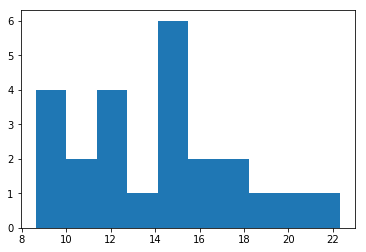

In [3]:
plt.hist(df['Congruent'])

Answer:-
We can see the most of congruent are between 14 and 16 .There are less number of congruent between 18 to 22

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [9]:
# Perform the statistical test here
df['intercept']=1
lm=sm.OLS(df['Congruent'],df[['intercept','Incongruent']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Congruent   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.108
Date:                Sun, 18 Mar 2018   Prob (F-statistic):             0.0918
Time:                        01:20:56   Log-Likelihood:                -62.428
No. Observations:                  24   AIC:                             128.9
Df Residuals:                      22   BIC:                             131.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       8.3040      3.333      2.491      0.021       1.391      15.217
Incongruent     0.2610      0.148      1.763      0.092      -0.046       0.568
==============================================================================
Omnibus:                        1.050   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.994
Skew:                           0.423   Prob(JB):                        0.608
Kurtosis:                       2.472   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Incongruent P-value=0.092 .Since it is greater than 0.05 so .We reject the null hyphothesis and accept the alternative hyphothesis

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--